# Исследование объявлений о продаже квартир

## 1 Обзор данных

In [1]:
# импорт библиотеки и открытие файла
import pandas as pd
import matplotlib as plt
from pylab import rcParams

data = pd.read_csv('E:\My documents\Studying\Data_Analyst\Projects\pr_3_real_estate_service/real_estate_data.csv', sep='\t')

In [2]:
# настройки для графиков
rcParams['figure.figsize'] = 6, 4

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-pastel')

In [3]:
# вывод первых 10 строк датафрейма
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# сохранение первоначального количества строк в переменной
old_data = data.shape[0]

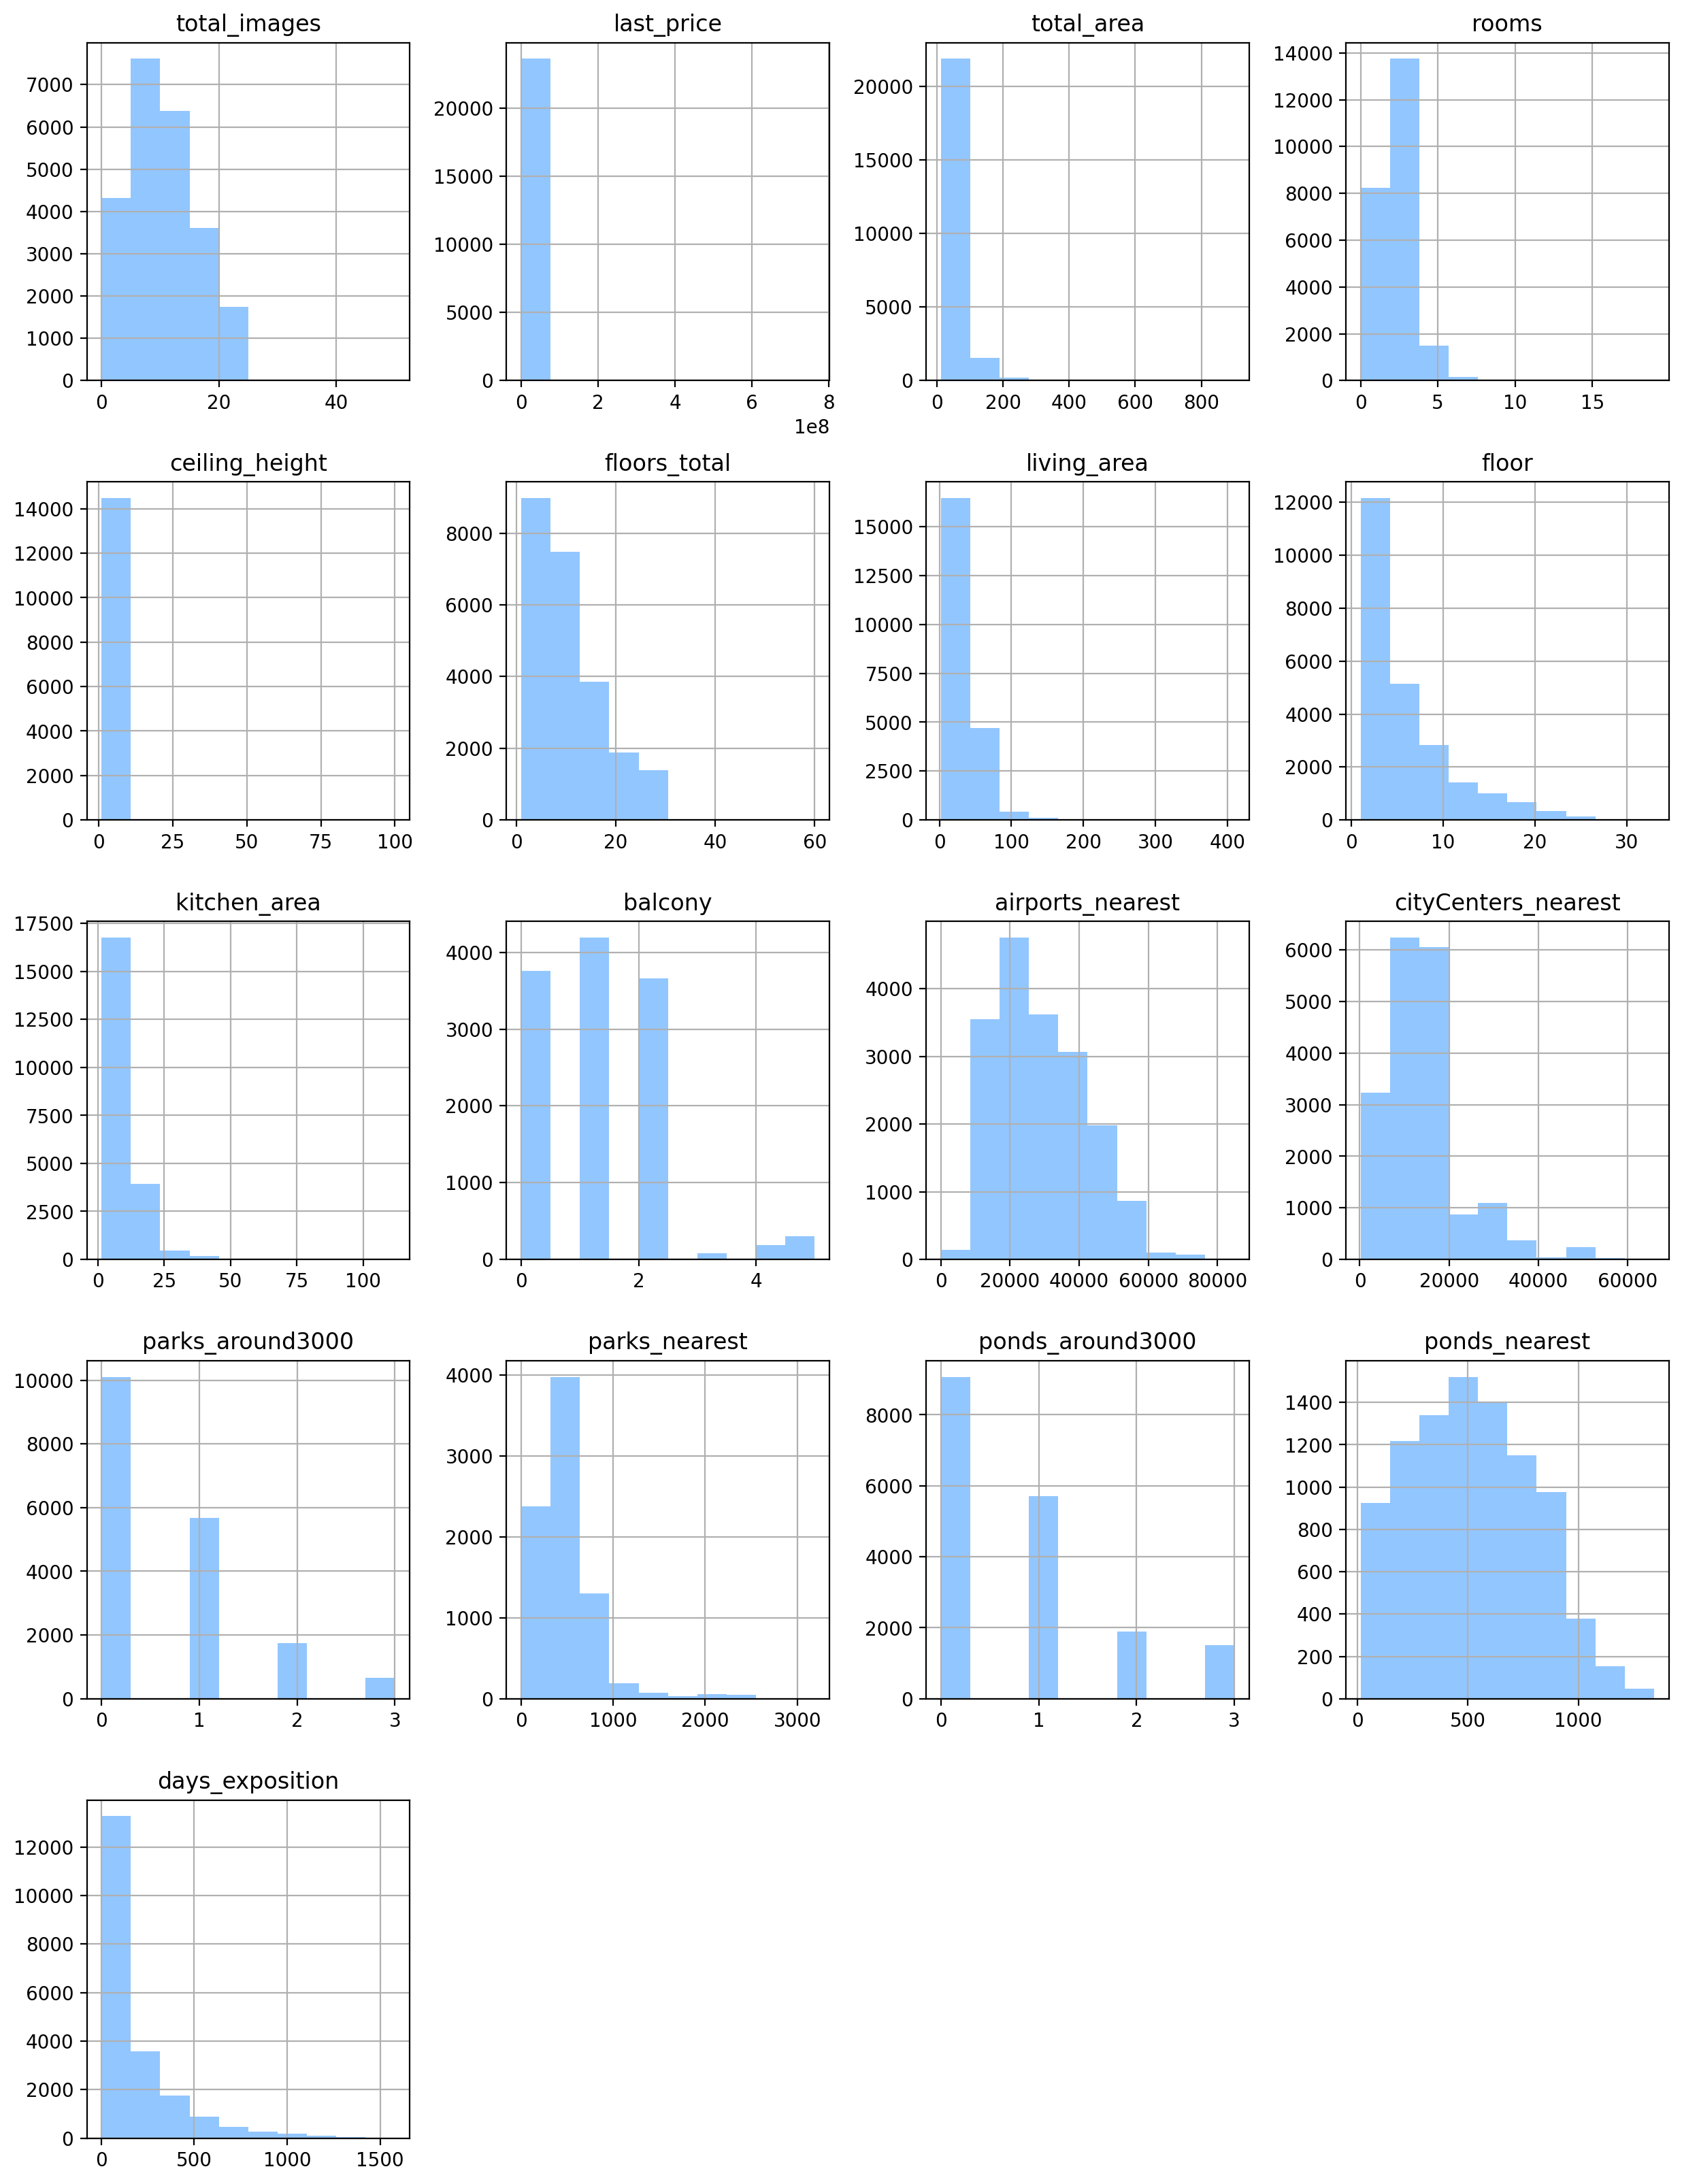

In [6]:
# построение общей гистограммы для всех столбцов датафрейма
data.hist(figsize=(15, 20));

На основании полученной информации и построенных графиков можно сделать следующие выводы:
- в более, чем половине столбцов датафрейма, пропущено большое количество значений;
- у нескольких столбцов неверно определен тип данных;
- у большинства характеристик имеются выбросы, то есть, можно говорить о наличии аномальных значений.

## 2 Предобработка данных

### Обработка пропусков

In [7]:
# подсчет количества пропусков в каждом из столбцов
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Исходя из полученной информации о наличии пропусков, можно удалить объявления, где не указано название населенного пункта (т.к. это одна из основных характеристик), и можно заменить следующие:
- столбец с высотой потолков, т.к. если значение пропущено, вероятнее всего высота потолка стандартная и равна наиболее распространенной величине (моде) - 2,5 м.
- столбец с данными о том, является ли квартира апартаментами или нет: т.к. если не указано, то скорее всего не является;
- столбец с количеством балконов: т.к. скорее всего, если информация по ним не указана, то в квартире их нет;
- столбцы с количеством парков/водоемов в радиусе 3 км, т.к. скорей всего они отсутствуют.

Столбцы с жилой площадью, площадью кухни можно заполнить, исходя из средней их доли в общей площади в зависимости от типа квартиры, после устранения неявных дубликатов и аномалий.

Остальные пропуски (в столбцах с количеством этажей в доме, расстоянием до аэропорта, центра города, ближайшего парка/водоема) заполнить не представляется возможным. 


In [8]:
# удаление строк с пропуском в названии населенного пункта
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [9]:
# замена пропусков 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mode()[0])
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [10]:
# проверка устранения пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

### Обработка аномальных значений

In [11]:
# выгрузка характеристик, дающих представление о выборке
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.666214,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.996293,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сразу можно заметить отчетливые выбросы в столбцах 'total_area', 'rooms', 'last_price' и 'floors_total'.

In [12]:
# удаление квартир с ценой 763 млн., количеством комнат = 19, общей площадью 900 кв.м. и этажностью дома = 60
data = data.loc[data['last_price'] != 763000000].reset_index(drop=True)
data = data.loc[data['total_area'] != 900].reset_index(drop=True)
data = data.loc[data['rooms'] != 19].reset_index(drop=True)
data = data.loc[data['floors_total'] != 60].reset_index(drop=True)

In [13]:
# выгрузка уникальных значений названий населенных пунктов
display(data['locality_name'].unique())
data['locality_name'].nunique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

364

Как мы видим, в написании поселков есть различия: посе(ё)лок, посе(ё)лок городского типа, городской посе(ё)лок и т.д. Всего уникальных значений на данный момент 364.
Логичнее всего, во избежание повторов, удалить типы населенных пунктов и оставить только названия.

In [14]:
# устранение неявных дубликатов в видах населенных пунктов
def change_locality_name(locality_name):
    splited_name = locality_name.split(' ')
    list = ['поселок', 'посёлок', 'городского', 'типа', 'городской', 'деревня', 'село', 'садоводческое', 'некоммерческое', 'товарищество', 'при', 'железнодорожной', 'станции', 'коттеджный', 'садовое']
    changed_names = [name for name in splited_name if name not in list]
    return ' '.join(changed_names)

data['locality_name'] = data['locality_name'].apply(change_locality_name)

In [15]:
# проверка количества уникальных названий населенных пунктов после устранения неявных дубликатов
data['locality_name'].nunique()
# избавились от 59 дубликатов

305

In [16]:
# выгрузка уникальных значений с количеством комнат
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16]

In [17]:
# выгрузка среднего значения общей площади для квартир с 0 комнат
data.query('rooms == 0')['total_area'].mean()

29.279746192893413

Так как среднее значение общей площади в таких квартирах = 29,3 кв.м., то можно предположить, что все эти квартиры однокомнатные.

In [18]:
# исправление ошибочных значений количества комнат
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [19]:
# выгрузка уникальных значений количества балконов
sorted(data['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

В полученной выгрузке мы видим аномально высокие значения (> 10 метров). При этом значения от 20 м и выше с нулевой дробной частью скорее всего являются опечатками, соответственно, их имеет смысл исправить. От значений с ненулевой дробной частью логичнее всего избавиться.

In [20]:
# исправление ошибочных значений высоты потолка
data.loc[(data['ceiling_height'] > 10) & (data['ceiling_height']%1 == 0)] = data['ceiling_height'] / 10

In [21]:
# удаление из датафрейма объявлений с ошибкой в высоте потолка
data = data.loc[data['ceiling_height'] < 10].reset_index(drop=True)

In [22]:
# проверка уникальных значений количества балконов
data['balcony'].unique()

array([0. , 2. , 1. , 5. , 4. , 1.4, 3. ])

Количество балконов 1.4? Сделаем срез по этому значению.

In [23]:
# выгрузка объявлений с количеством балконов 1.4
data.query('balcony == 1.4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
3143,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
4635,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
4867,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
5067,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
5237,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
5659,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
5796,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
6235,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7
9362,2.5,3.2,2.5,2.7,2.4,2.7,2.6,2.7,2.5,2.5,2.7,2.5,2.5,1.4,2.0,2.7,2.5,2.7,2.7,3.2,10.0,2.7


Как мы видим, в этих объявлениях абсолютная неразбериха. Необходимо удалить данные строки во избежание путаницы.

In [24]:
# удаление из датафрейма объявлений с количеством балконов 1.4
data = data.loc[data['balcony'] != 1.4].reset_index(drop=True)

Также, смущает еще количество балконов, равное 5, посмотрим на эти данные.

In [25]:
# выгрузка объявлений с 5 балконами
data.query('balcony == 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16.0,7900000.0,74.00,2016-05-04T00:00:00,3.0,2.50,14.0,59.0,8.0,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13.0,22000000.0,161.80,2015-07-08T00:00:00,4.0,2.80,4.0,80.9,2.0,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18.0,10999000.0,97.20,2017-11-13T00:00:00,3.0,2.50,16.0,NaN,16.0,False,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
267,2.0,14700000.0,120.00,2018-09-07T00:00:00,3.0,2.75,20.0,63.0,18.0,False,False,False,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20.0,12500000.0,86.00,2018-10-19T00:00:00,3.0,2.80,25.0,47.0,3.0,False,False,False,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23070,8.0,5780000.0,55.00,2017-11-23T00:00:00,2.0,2.55,10.0,28.6,8.0,False,False,False,8.0,5.0,Санкт-Петербург,42447.0,11146.0,1.0,451.0,0.0,NaN,41.0
23211,13.0,7000000.0,88.00,2018-03-02T00:00:00,3.0,2.50,15.0,54.0,12.0,False,False,False,12.0,5.0,Колпино,24501.0,30287.0,1.0,372.0,0.0,NaN,NaN
23285,10.0,4300000.0,52.00,2019-04-21T00:00:00,1.0,2.70,16.0,28.0,8.0,False,False,False,11.0,5.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23448,14.0,5800000.0,60.69,2018-03-13T00:00:00,3.0,2.50,9.0,39.7,2.0,False,False,False,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


Если наличие 5 балконов в квартирах с более чем 3 комнатами объяснимо, то в одно-, двухкомнатных нет.

Поэтому целесообразно удалить строки с данными объявлениями.

In [26]:
# удаление из датафрейма объявлений на 1, 2-комнатные квартиры с 5 балконами
data = data.loc[((data['balcony'] == 5) & (data['rooms'] >= 3)) | (data['balcony'] < 5)].reset_index(drop=True)

### Обработка пропусков (продолжение)

In [27]:
# построение сводной таблицы со средними значениями общей, жилой и площади кухни
# в зависимости от типа квартиры
square = data.query('not kitchen_area.isna() and not living_area.isna()').pivot_table(index='rooms', values=['living_area', 'kitchen_area', 'total_area'])
square.columns = ['kitchen_area', 'living_area', 'total_area']

In [28]:
# добавление столбцов с долей жилой и площади кухни от общей площади
square['percent_kitchen_area'] = square['kitchen_area'] / square['total_area']
square['percent_living_area'] = square['living_area'] / square['total_area']
square

,kitchen_area,living_area,total_area,percent_kitchen_area,percent_living_area
rooms,,,,,
1.0,9.512314,17.866499,37.709784,0.252251,0.473789
2.0,9.880303,31.667608,55.587764,0.177742,0.569687
3.0,11.250396,47.341694,77.378007,0.145395,0.611824
4.0,13.571411,66.874356,106.699545,0.127193,0.626754
5.0,18.381906,100.808993,161.236727,0.114006,0.625224
6.0,20.851354,130.998750,201.159896,0.103656,0.651217
7.0,21.252941,161.547059,253.772549,0.083748,0.636582
8.0,24.866667,162.466667,257.722222,0.096486,0.630394
9.0,25.071429,190.257143,316.114286,0.079311,0.601862


In [29]:
# замена пустых значений жилой площади в зависимости от типа квартиры
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()) & ((data['total_area'] * square.loc[t, 'percent_kitchen_area'] + data['living_area'] < data['total_area'] * 0.95) | (data['kitchen_area'].isna())), 'living_area'] = \
    data['total_area'] * square.loc[t, 'percent_living_area']

In [30]:
# замена пустых значений площади кухни в зависимости от типа квартиры
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()) & ((data['total_area'] * square.loc[t, 'percent_kitchen_area'] + data['living_area'] < data['total_area'] * 0.95) | (data['living_area'].isna())), 'kitchen_area'] = \
    data['total_area'] * square.loc[t, 'percent_kitchen_area']

In [31]:
# проверка устранения пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area               430
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              181
balcony                     0
locality_name               0
airports_nearest         5500
cityCenters_nearest      5477
parks_around3000            0
parks_nearest           15497
ponds_around3000            0
ponds_nearest           14482
days_exposition          3153
dtype: int64

Ситуация стала сильно лучше, пропусков намного меньше. В столбцах с жилой площадью и площадью кухни остались пропуски лишь там, где заполнение средней долей приведет к тому, что их сумма будет больше, чем 95% от общей площади (что заложено в условии заполнения).

По остальным столбцам заполнение пропусков может привести к искажению данных, а удаление строк с пропусками - к большой потери данных, поэтому оставим их без изменений.

### Изменение типов данных

In [32]:
# повторный вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23515 entries, 0 to 23514
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23515 non-null  float64
 1   last_price            23515 non-null  float64
 2   total_area            23515 non-null  float64
 3   first_day_exposition  23515 non-null  object 
 4   rooms                 23515 non-null  float64
 5   ceiling_height        23515 non-null  float64
 6   floors_total          23430 non-null  float64
 7   living_area           23085 non-null  float64
 8   floor                 23515 non-null  float64
 9   is_apartment          23515 non-null  object 
 10  studio                23515 non-null  object 
 11  open_plan             23515 non-null  object 
 12  kitchen_area          23334 non-null  float64
 13  balcony               23515 non-null  float64
 14  locality_name         23515 non-null  object 
 15  airports_nearest   

Из имеющихся столбцов необходимо изменить тип данных у столбца с датой публикации для проведения операций с датой и временем, а также у столбца с количеством балконов. Типы остальных столбцов, в целом, устраивают.

In [33]:
# изменение типа данных у столбца с датой публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
# изменение типа данных у столбца с количеством балконов
data['balcony'] = data['balcony'].astype('int')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23515 entries, 0 to 23514
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23515 non-null  float64       
 1   last_price            23515 non-null  float64       
 2   total_area            23515 non-null  float64       
 3   first_day_exposition  23515 non-null  datetime64[ns]
 4   rooms                 23515 non-null  float64       
 5   ceiling_height        23515 non-null  float64       
 6   floors_total          23430 non-null  float64       
 7   living_area           23085 non-null  float64       
 8   floor                 23515 non-null  float64       
 9   is_apartment          23515 non-null  object        
 10  studio                23515 non-null  object        
 11  open_plan             23515 non-null  object        
 12  kitchen_area          23334 non-null  float64       
 13  balcony         

In [36]:
# расчет отношения количества строк после проведения предобработки
# к изначальному количеству строк
data.shape[0] / old_data

0.9922359593231782

Таким образом, в данном разделе мы заменили пропуски в столбцах, где это представляется возможным, изменили типы данных в столбцах датафрейма, устранили неявные дубликаты, а также аномальные значения.

Количество удаленных данных составило менее 1% от исходного датасета.

## Добавление новых столбцов

In [37]:
# добавление столбцы с ценой одного квадратного метра
data['price_for_sqm'] = (data['last_price'] / data['total_area']).round()

In [38]:
# добавление столбцов с днем недели, месяцем и годом публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [39]:
# добавление столбца с типом этажа
def categorize_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

data['floor_type'] = data.apply(categorize_floor, axis=1)

In [40]:
# добавление столбца с расстоянием до центра города в километрах
data['city_centre_km'] = (data['cityCenters_nearest'] / 1000).round()

In [41]:
# изменение порядка столбцов
data = data[['locality_name', 'rooms', 'last_price', 'total_area', 'price_for_sqm', 'living_area', 'kitchen_area', 'floor', 'floor_type', 'floors_total', 'is_apartment', 'studio', 'open_plan', 'balcony', 'ceiling_height', 'cityCenters_nearest', 'city_centre_km', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'airports_nearest', 'first_day_exposition', 'weekday', 'month', 'year', 'days_exposition', 'total_images']]

## Исследовательский анализ данных

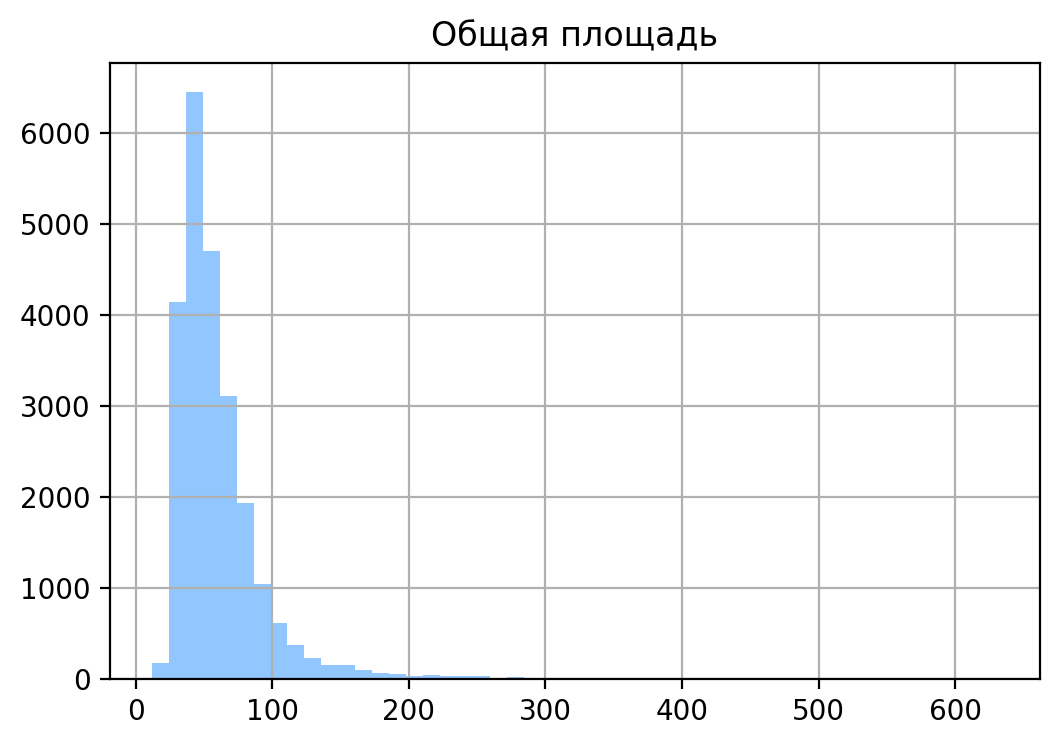

In [42]:
# построение гистограммы для общей площади
data['total_area'].hist(bins=50).set_title('Общая площадь');

На основании построенной гистограммы можно сделать вывод о том, что больше всего значений приходится на общую площадь ~от 30 до 50 кв.м. Также, можно говорить о наличии выбросов: есть квартиры площадью свыше 600 кв.м.

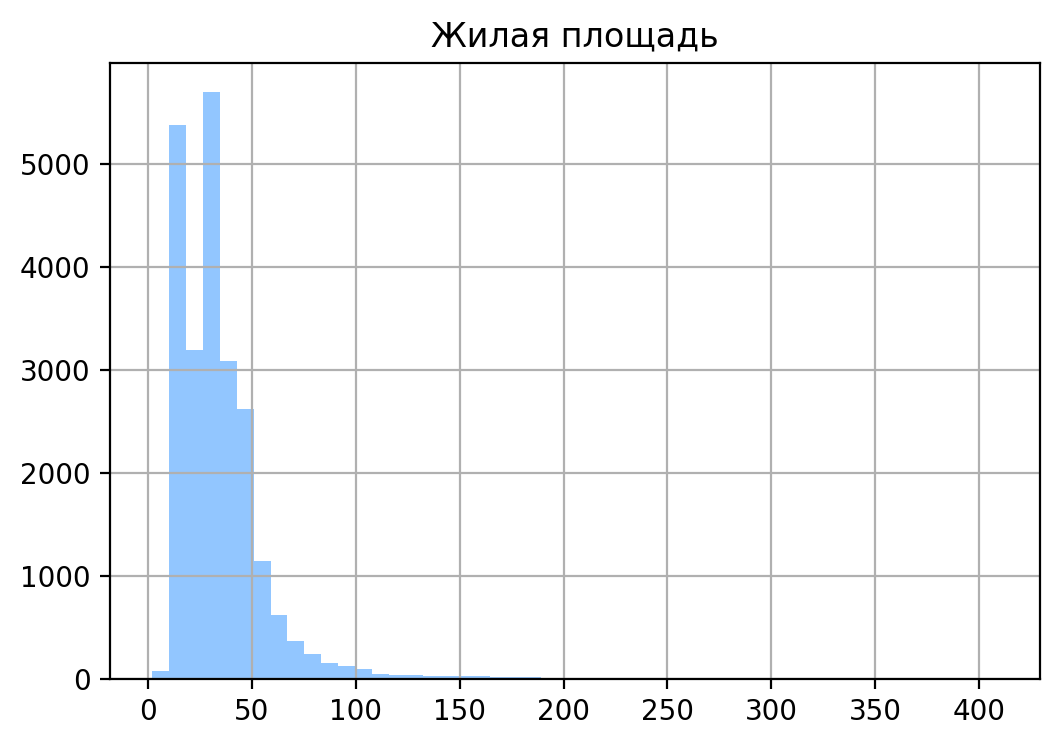

In [43]:
# построение гистограммы для жилой площади
data.loc[~data['living_area'].isna(), 'living_area'].hist(bins=50).set_title('Жилая площадь');

Больше всего значений жилой площади приходится на ~15-20 кв.м., также есть выброс в районе 400 кв.м.

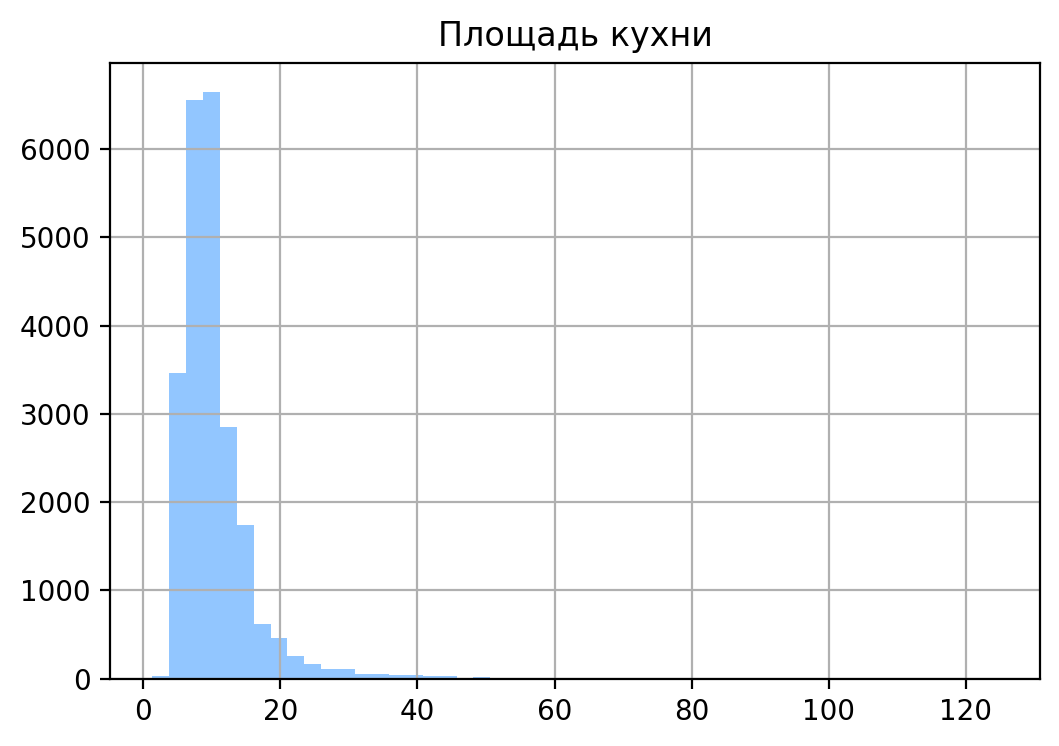

In [44]:
# построение гистограммы для площади кухни
data.loc[~data['kitchen_area'].isna(), 'kitchen_area'].hist(bins=50).set_title('Площадь кухни');

Основная масса значений сосредоточена в интервале ~5-15 кв.м., но есть и исключения, выбросы площадью более 120 кв.м.

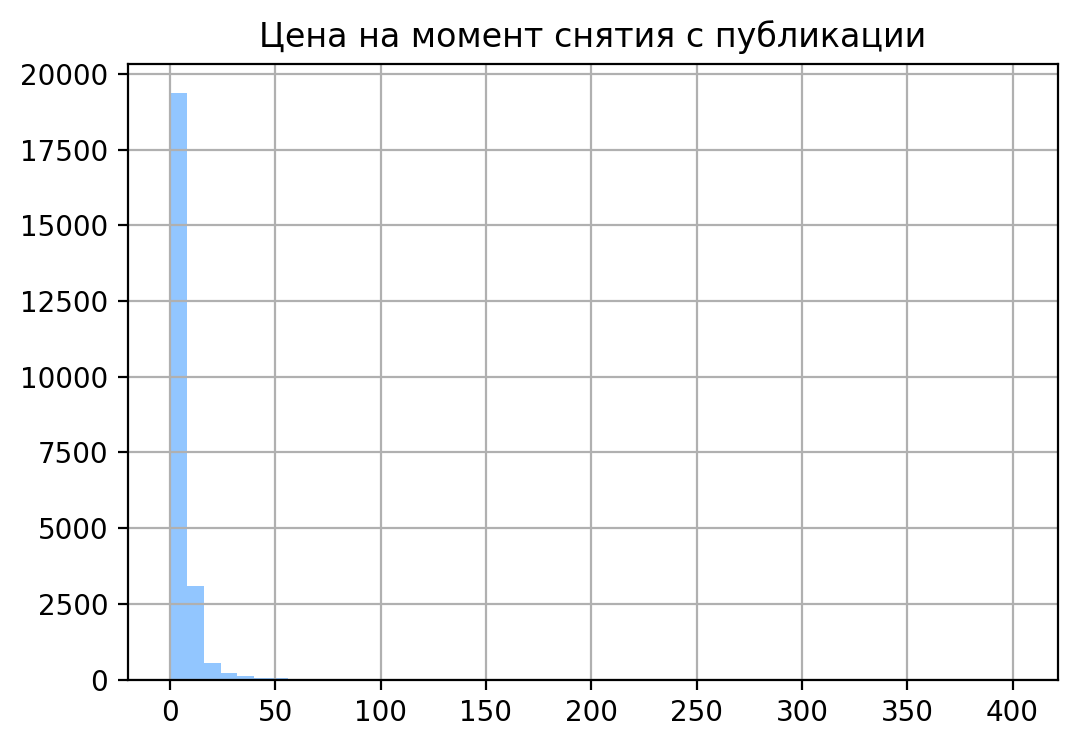

In [45]:
# построение гистограммы для цены
(data['last_price']/1000000).hist(bins=50).set_title('Цена на момент снятия с публикации');

Больше всего значений сосредоточено в пределах 4 млн., но есть и высокие значения, превышающие 400 млн.

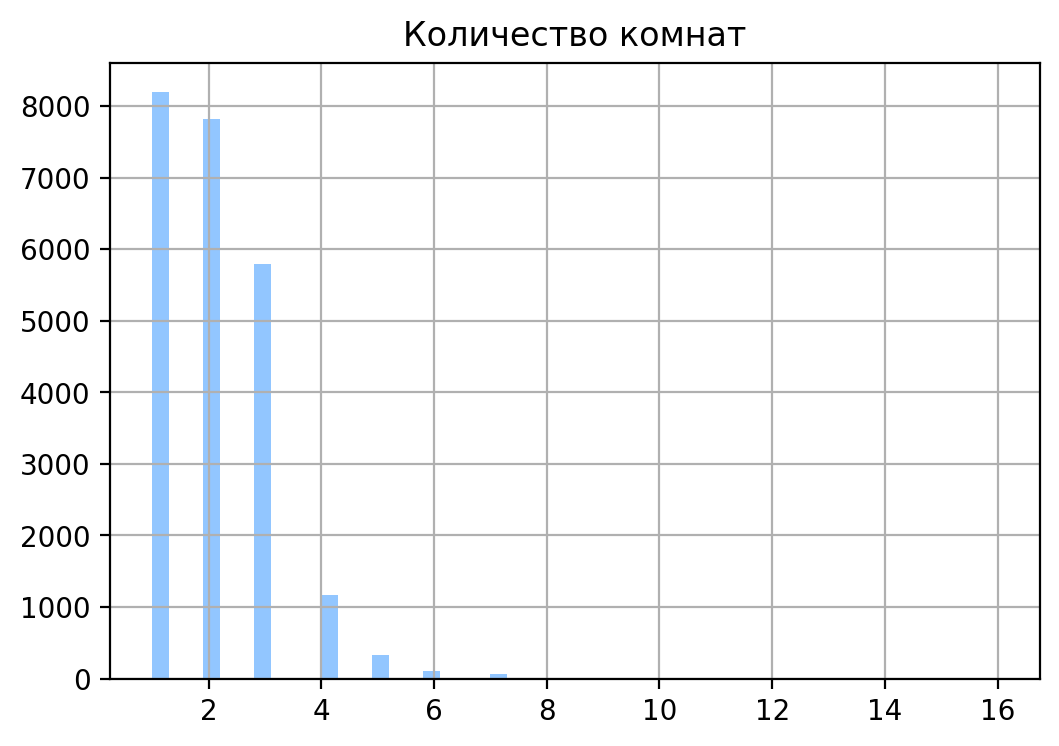

In [46]:
# построение гистограммы для количества комнат
data['rooms'].hist(bins=50).set_title('Количество комнат');

В датафрейме преобладают однокомнатные квартиры, совсем немного уступают им двухкомнатные. Кроме того, присутствуют квартиры с количеством комнат 14-16.

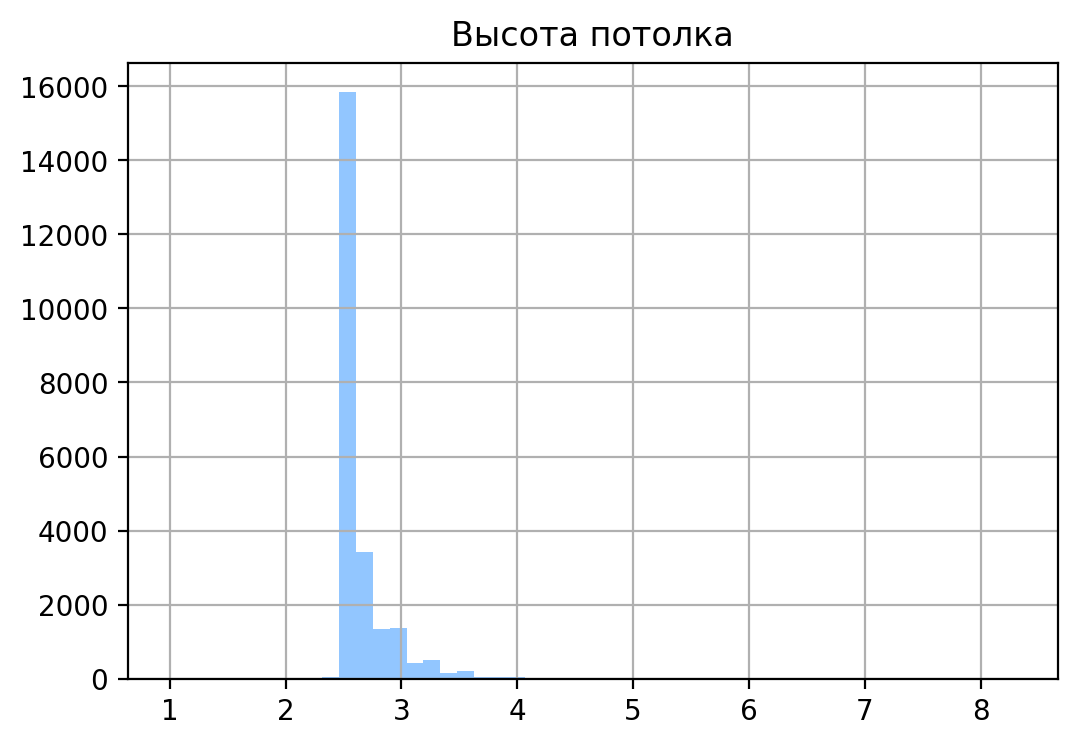

In [47]:
# построение гистограммы для высоты потолков
data['ceiling_height'].hist(bins=50).set_title('Высота потолка');

Больше половины значений высоты потолка составляют 2,5 метра, но даже после устранения аномальных значений остаются довольно высокие 8 и более метров.

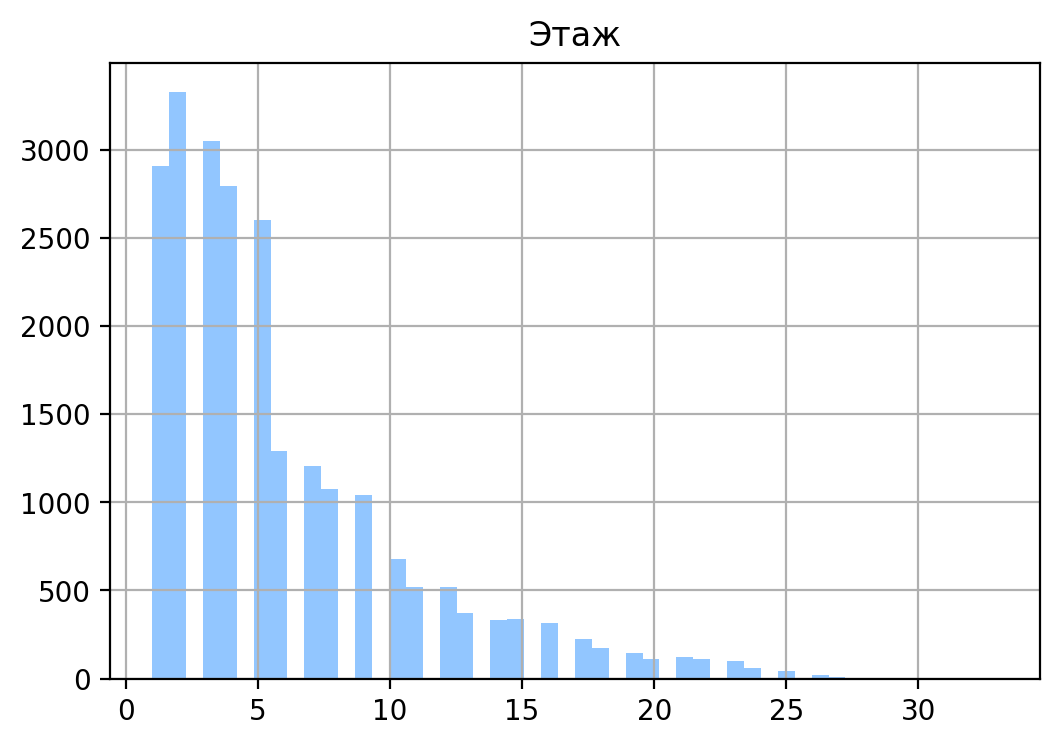

In [48]:
# построение гистограммы для этажа квартиры
data['floor'].hist(bins=50).set_title('Этаж');

Преобладают квартиры, находящиеся на 2 этаже, незначительно уступают им квартиры находящиеся на 3 этаже. Кроме того, есть выбросы, этаж которых превышает традцатый.

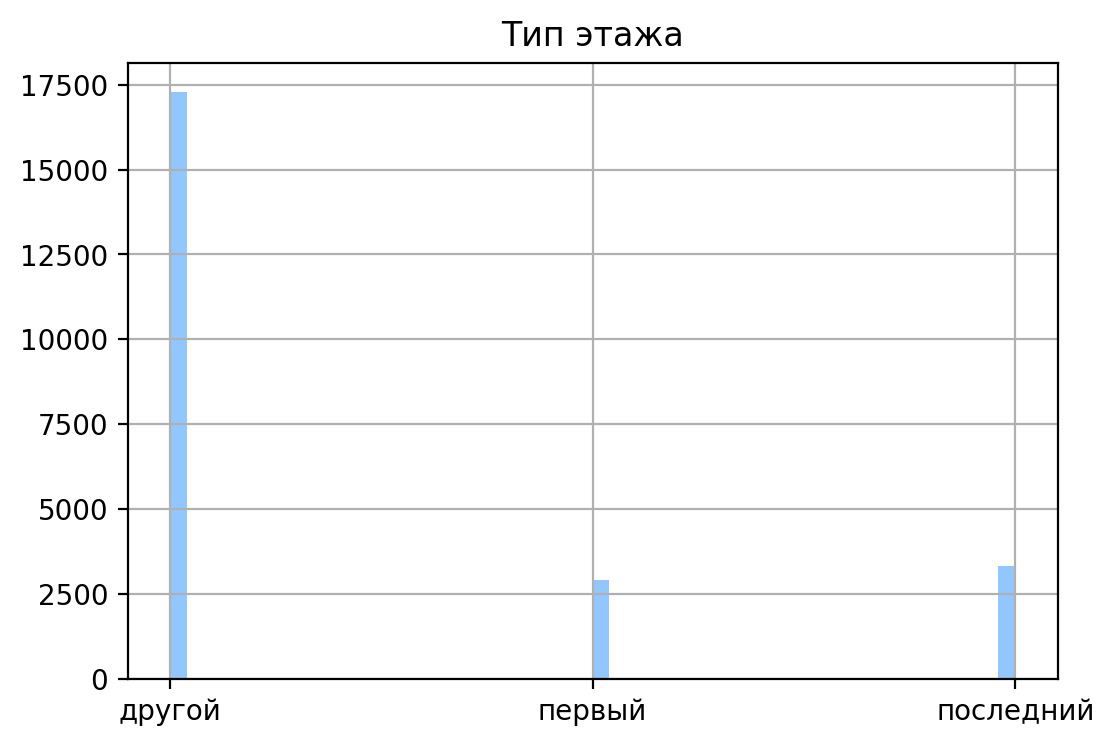

In [49]:
# построение гистограммы для типа этажа
data['floor_type'].hist(bins=50).set_title('Тип этажа');

Основная масса квартир сосредоточена в категории типа этажа "другой", что является логичным. При этом меньше всего квартир находится на первом этаже.

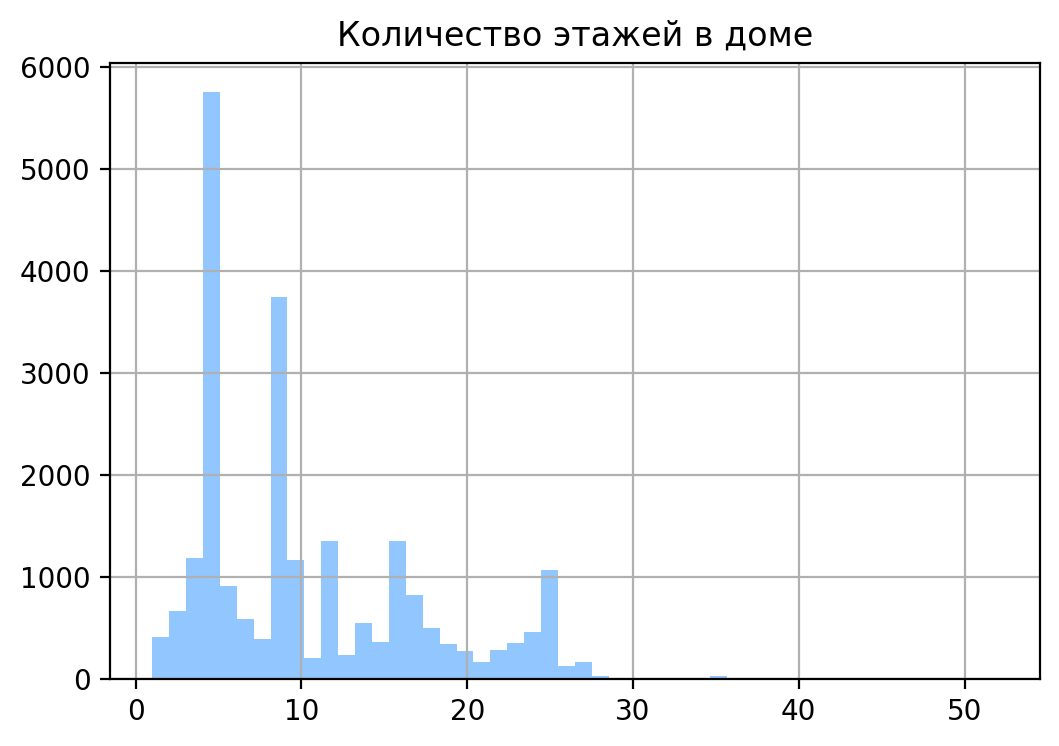

In [50]:
# построение гистограммы для общего количества этажей в доме
data.loc[~data['floors_total'].isna(), 'floors_total'].hist(bins=50).set_title('Количество этажей в доме');

В датасете преобладают объявления о продаже квартир в пятиэтажных домах. Второе место по количеству значений занимают девятиэтажные дома. Есть и единичные объявления в домах с количеством этажей свыше 40 и даже 50.

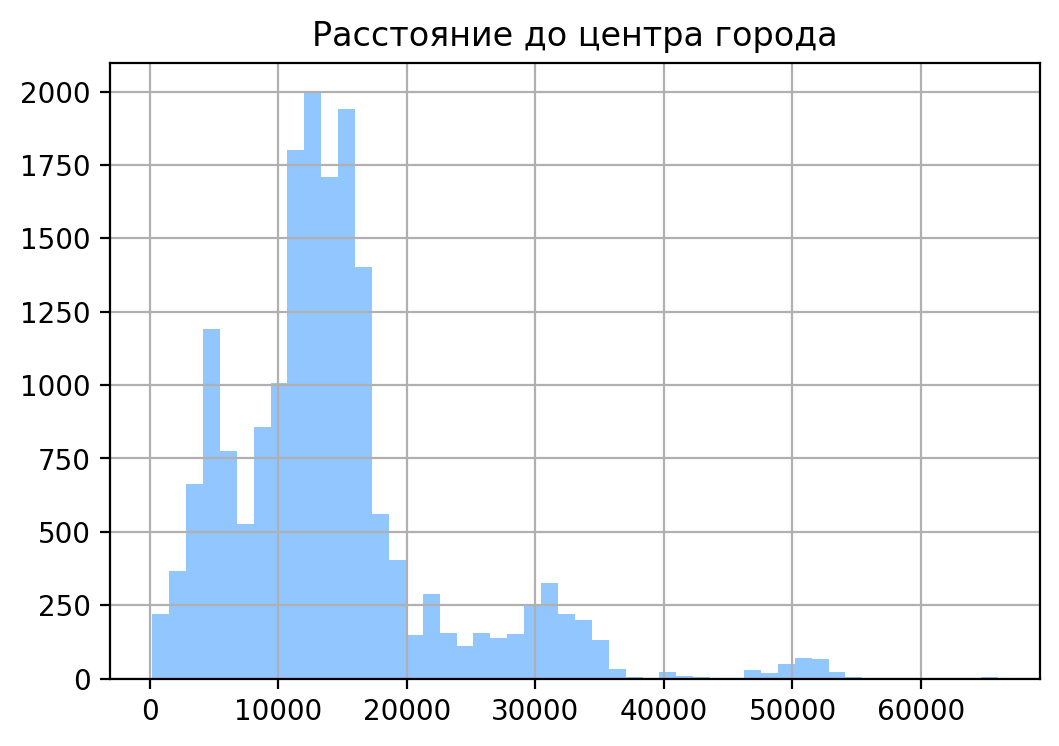

In [51]:
# построение гистограммы для расстояния до центра города
data.loc[~data['cityCenters_nearest'].isna(), 'cityCenters_nearest'].hist(bins=50).set_title('Расстояние до центра города');

Больше всего значений сосредоточено в интервале ~10-12 км от центра города, но есть и выбросы, превышающие 60 км.

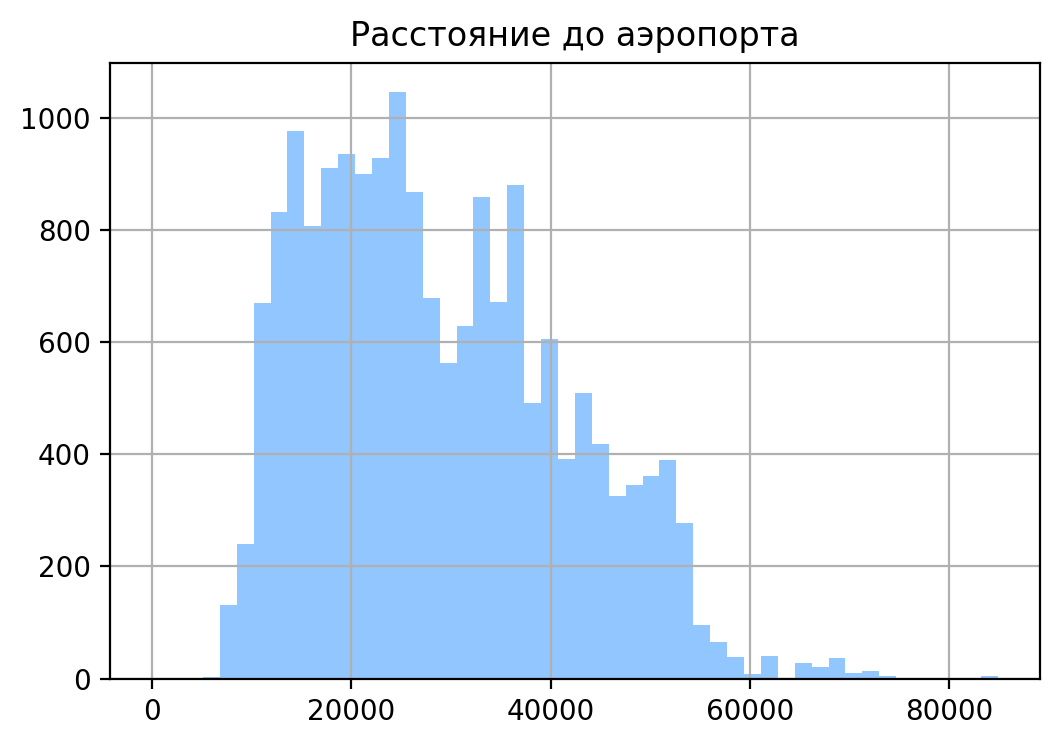

In [52]:
# построение гистограммы для расстояния до аэропорта
data.loc[~data['airports_nearest'].isna(), 'airports_nearest'].hist(bins=50).set_title('Расстояние до аэропорта');

Среди объявлений большая часть находится в промежутке от 10-35 км от аэропорта, есть проседания по значениям, но в целом график немного плавнее, чем в других характеристиках. Но, как и практически везде, есть отклонения в виде значений, превышающих 80 км от аэропорта, что в целом, не критично.

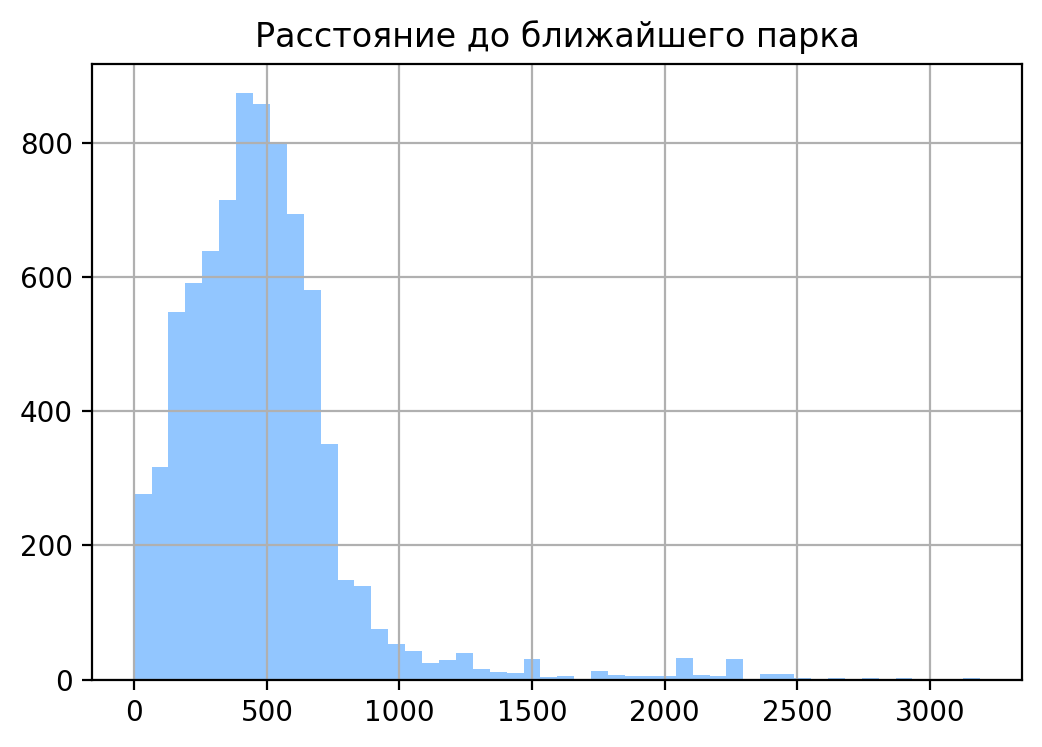

In [53]:
# построение гистограммы для расстояния до ближайшего парка
data.loc[~data['parks_nearest'].isna(), 'parks_nearest'].hist(bins=50).set_title('Расстояние до ближайшего парка');

Пиковые значения 400-500 м от парка, но нужно учитывать, что в данном столбце большое количество пропусков, заполнить которое не представляется возможным. А также есть квартиры, которые находятся от ближайшего парка на расстоянии, превышающем 3 км.

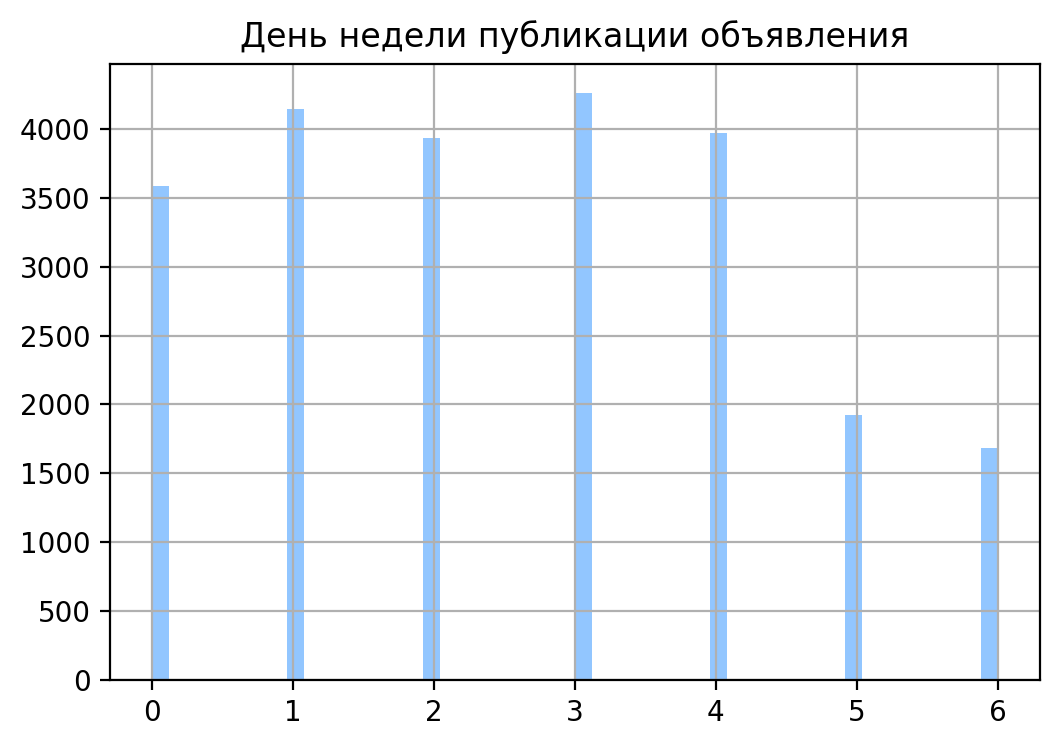

In [54]:
# построение гистограммы для дня недели публикации объявления
data['weekday'].hist(bins=50).set_title('День недели публикации объявления');

Больше всего объявлений было опубликовано в четверг и вторник, а меньше всего в воскресенье.

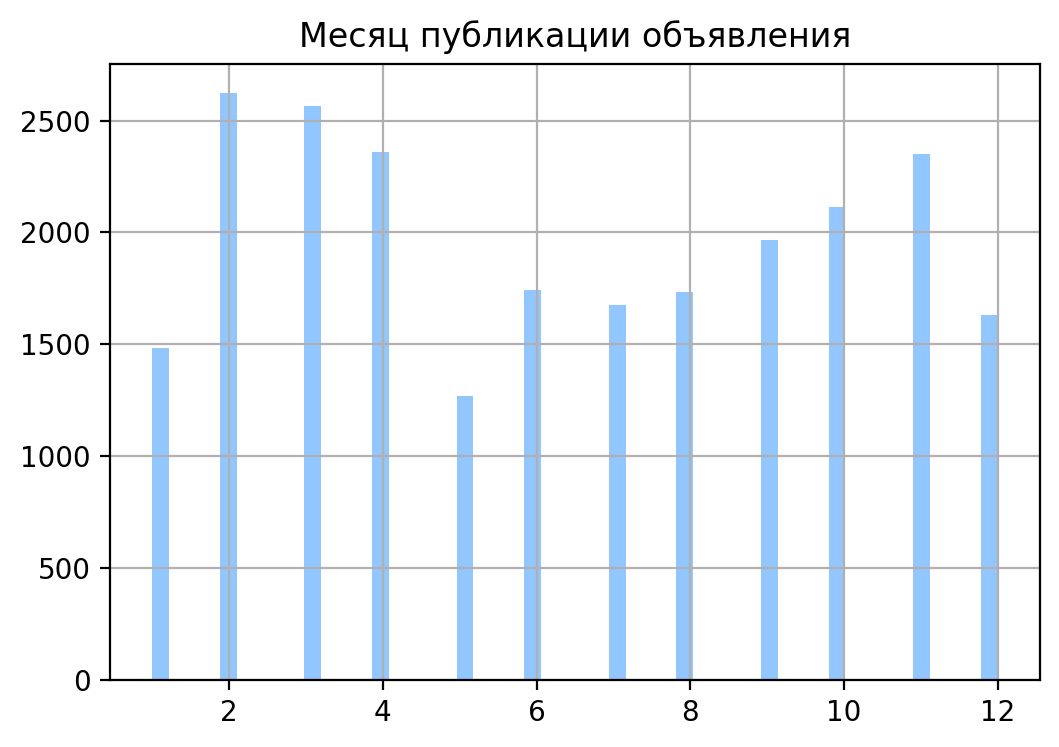

In [55]:
# построение гистограммы для месяца публикации объявления
data['month'].hist(bins=50).set_title('Месяц публикации объявления');

Основная масса объявлений была опубликована в феврале-марте, а меньше всего в мае.

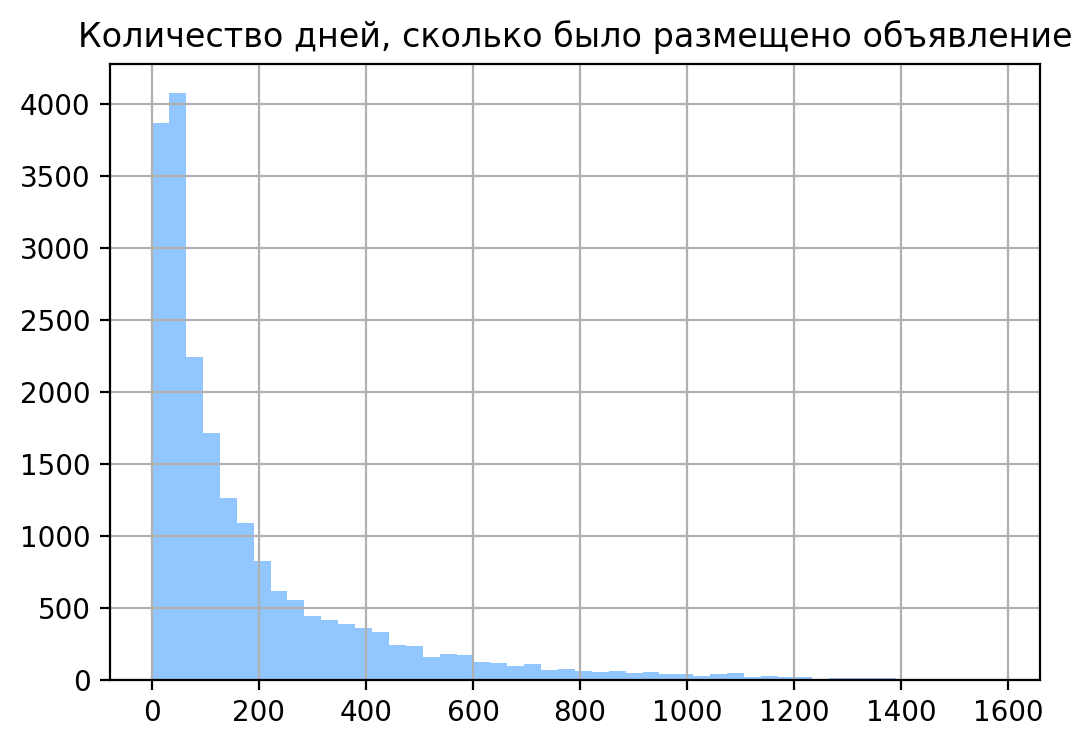

In [56]:
# построение гистограммы для количества дней, которое было размещено объявление
data.loc[~data['days_exposition'].isna(), 'days_exposition'].hist(bins=50).set_title('Количество дней, сколько было размещено объявление');

In [57]:
# расчет среднего, медианы, минимума и максимума для количества дней, которое было размещено объявление
data['days_exposition'].agg(['mean', 'median', 'min', 'max'])

mean       180.974413
median      95.000000
min          1.000000
max       1580.000000
Name: days_exposition, dtype: float64

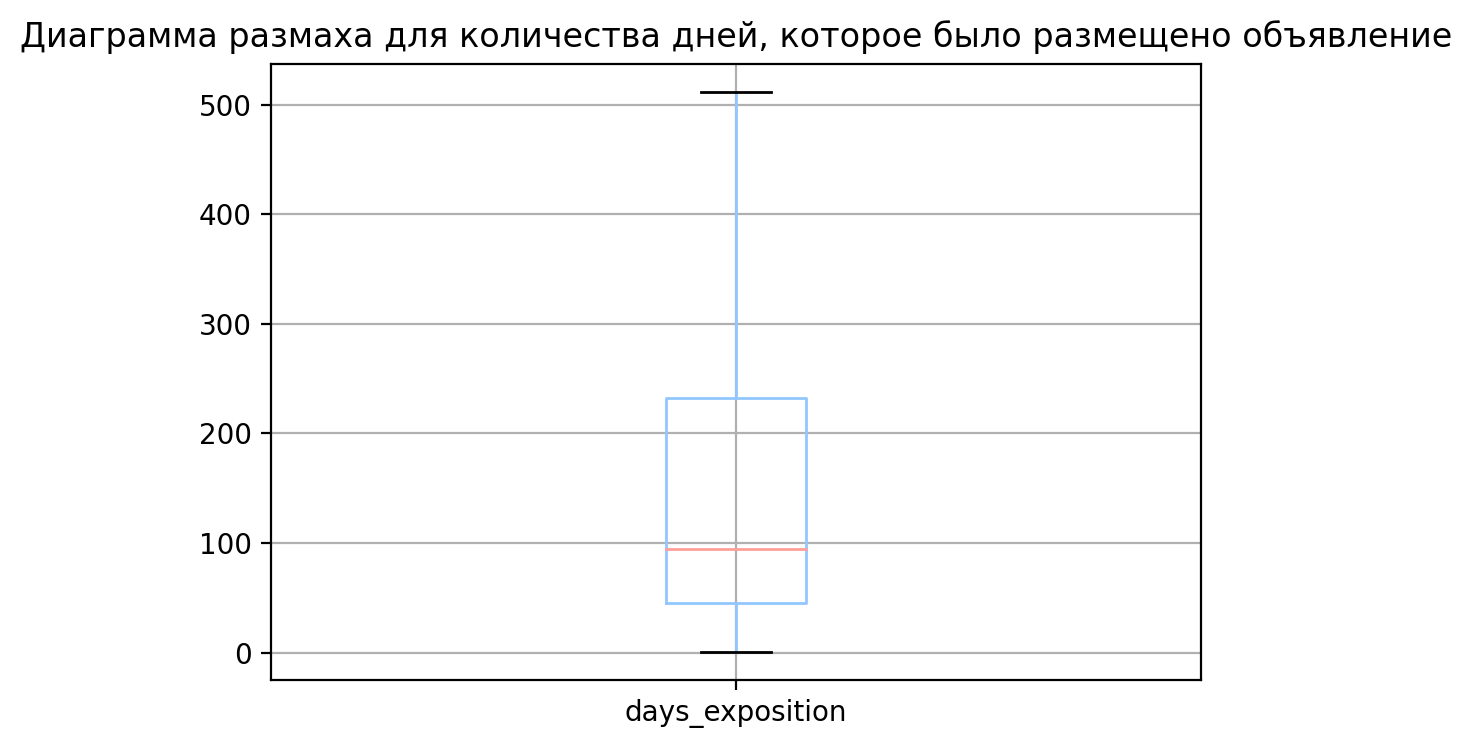

In [58]:
# построение диаграммы размаха для количества дней, которое было размещено объявление
data.boxplot('days_exposition', showfliers=False).set_title('Диаграмма размаха для количества дней, которое было размещено объявление');

Больше половины объявлений было размещено менее 200 дней. При этом существует большое отклонение между средним и медианным значением. Это объясняется тем, что велика разница между минимальным значением (1 день) и максимальным (1580 дней), что очень сильно влияет на расчет среднего арифметического.

In [59]:
# расчет коэффициентов корреляции 
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr().round(2)

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.70,0.62,0.53,0.39
total_area,0.70,1.00,0.94,0.62,0.76
living_area,0.62,0.94,1.00,0.46,0.84
kitchen_area,0.53,0.62,0.46,1.00,0.27
rooms,0.39,0.76,0.84,0.27,1.00


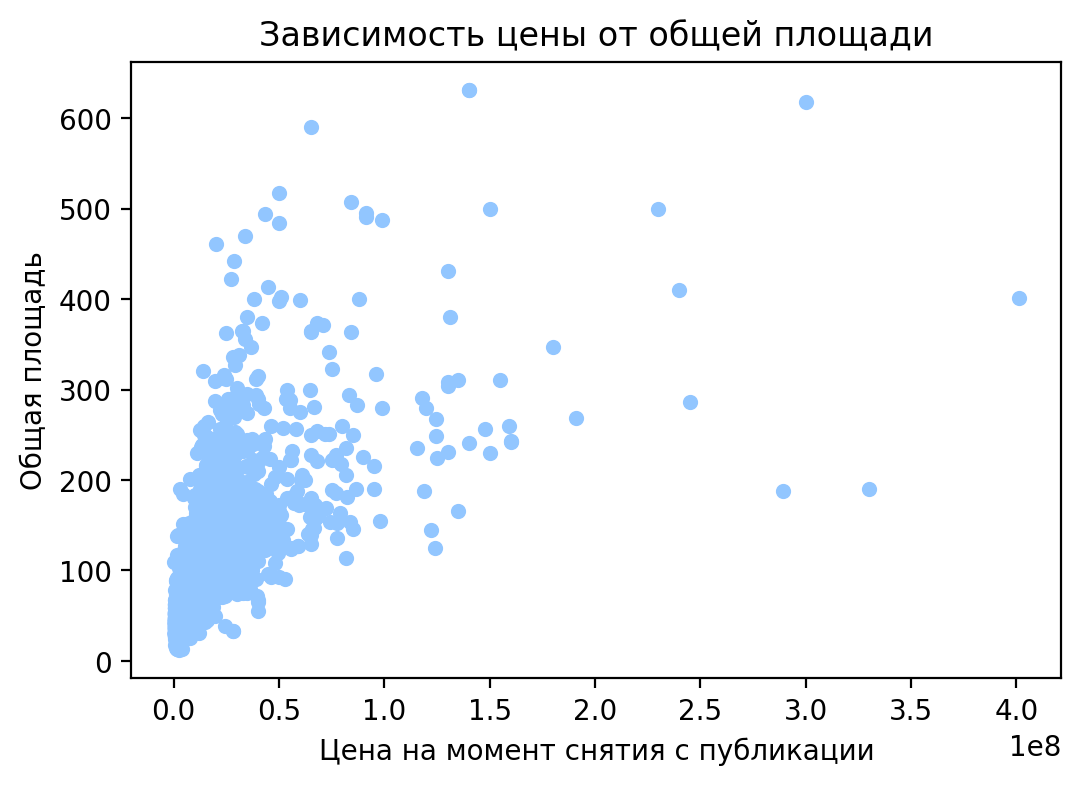

In [60]:
# построение диаграммы рассеяния для общей площади
data.plot(x='last_price', y='total_area', kind='scatter', xlabel='Цена на момент снятия с публикации', ylabel='Общая площадь').set_title('Зависимость цены от общей площади');

Между ценой объекта и общей площадью есть зависимость, что видно по графику, а также по коэффициенту корреляции, равному 0.7. Кроме этого, наблюдаются выбросы.

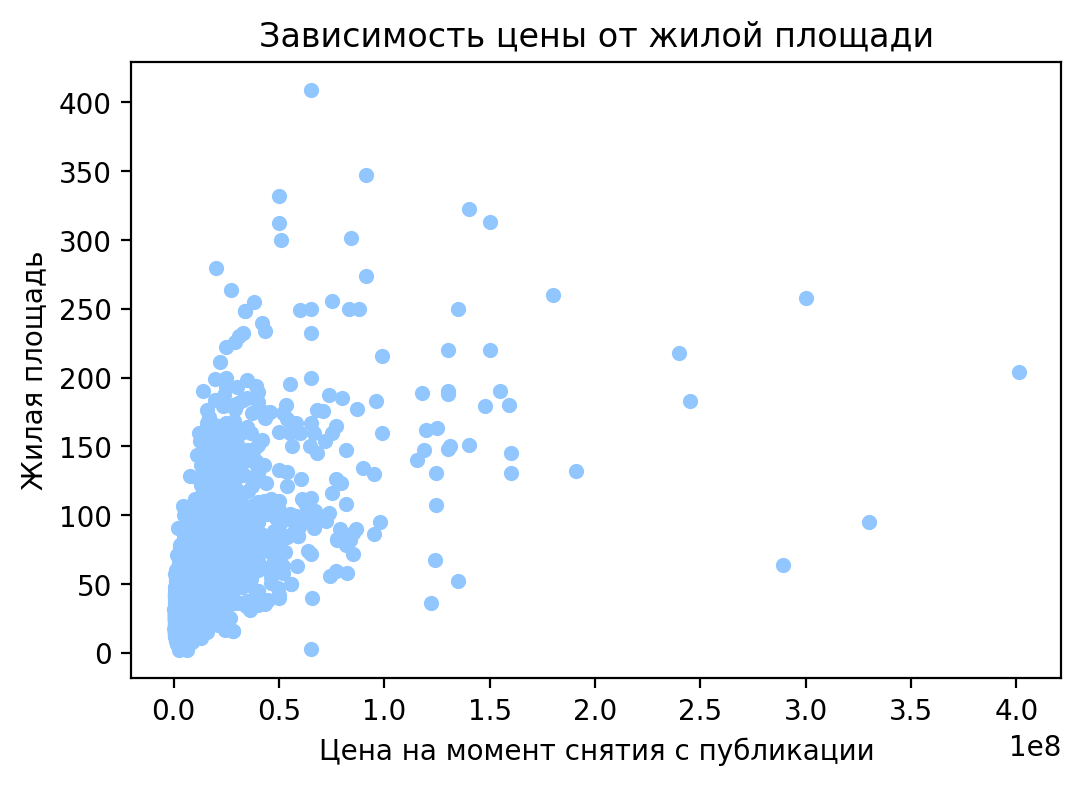

In [61]:
# построение диаграммы рассеяния для жилой площади
data.plot(x='last_price', y='living_area', kind='scatter', xlabel='Цена на момент снятия с публикации', ylabel='Жилая площадь').set_title('Зависимость цены от жилой площади');

Зависимость между ценой квартиры и жилой площадью имеет чуть меньшее значение (коэффициент корреляции составляет 0.62).

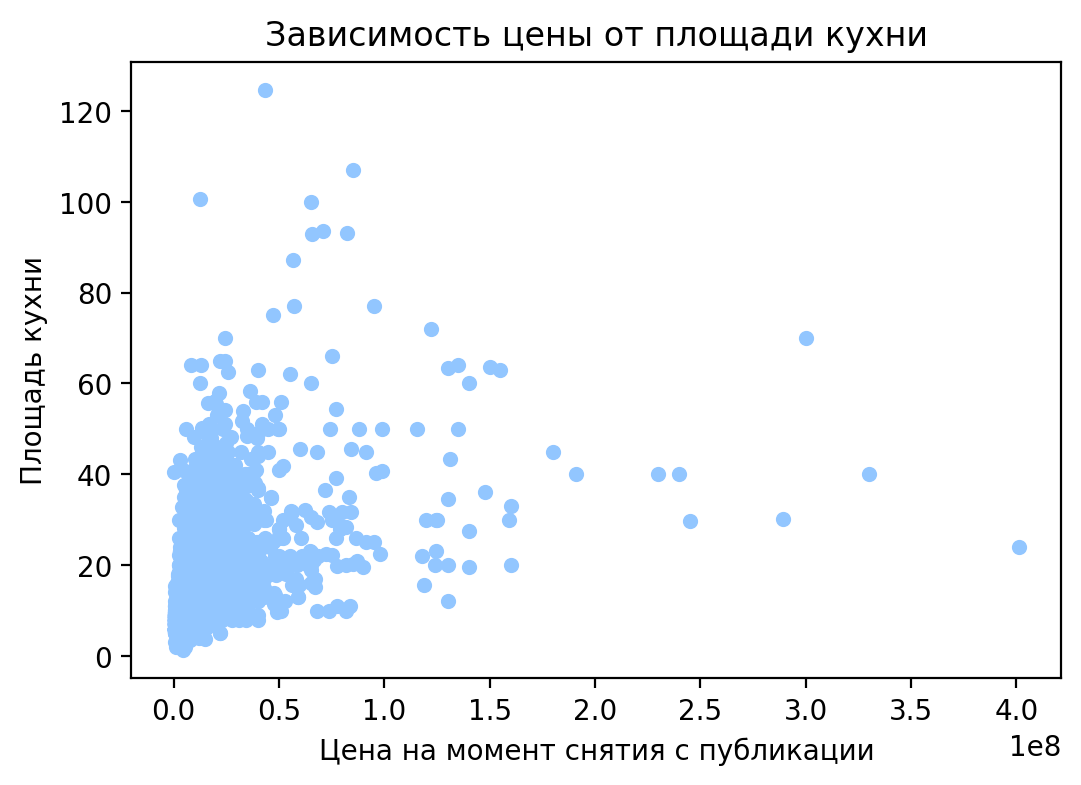

In [62]:
# построение диаграммы рассеяния для площади кухни
data.plot(x='last_price', y='kitchen_area', kind='scatter', xlabel='Цена на момент снятия с публикации', ylabel='Площадь кухни').set_title('Зависимость цены от площади кухни');

Между ценой и площадью кухни связь еще меньше (0.53).

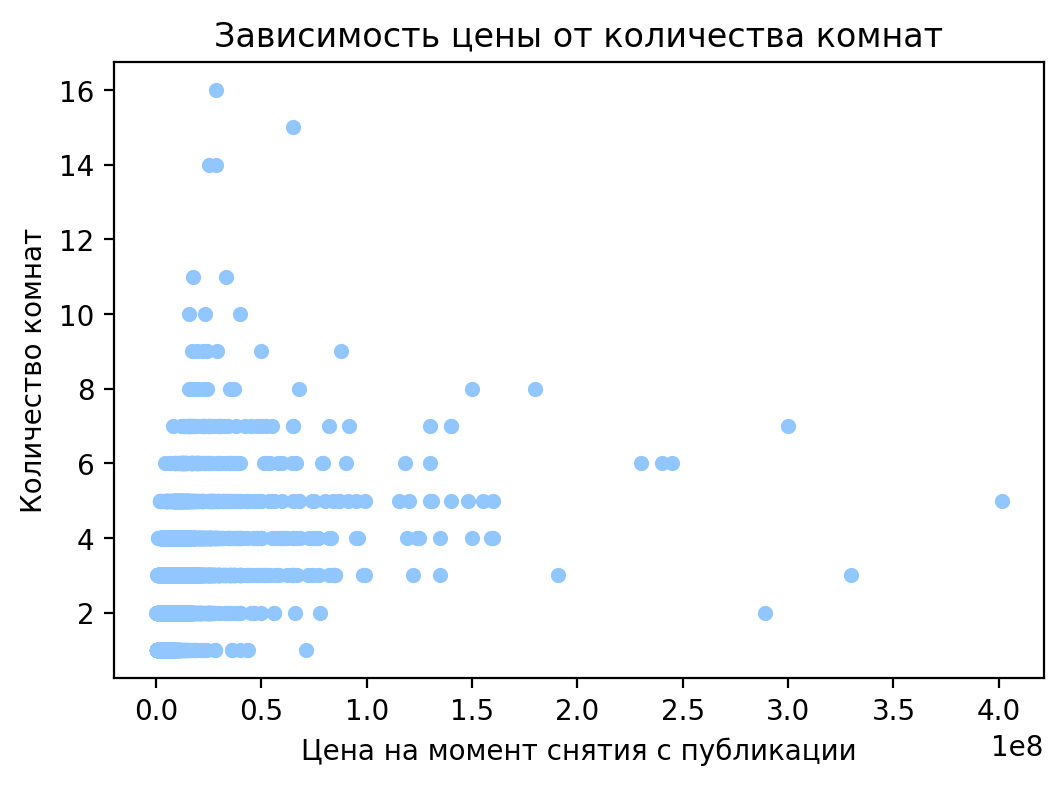

In [63]:
# построение диаграммы рассеяния для количества комнат
data.plot(x='last_price', y='rooms', kind='scatter', xlabel='Цена на момент снятия с публикации', ylabel='Количество комнат').set_title('Зависимость цены от количества комнат');

Корреляция между ценой квартиры и количеством комнат в ней имеет еще меньшее значение (0.39). Кроме того, есть большое количество выбросов.

In [64]:
# создание сводной таблицы с медианным значением цены в зависимости от типа этажа
df_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

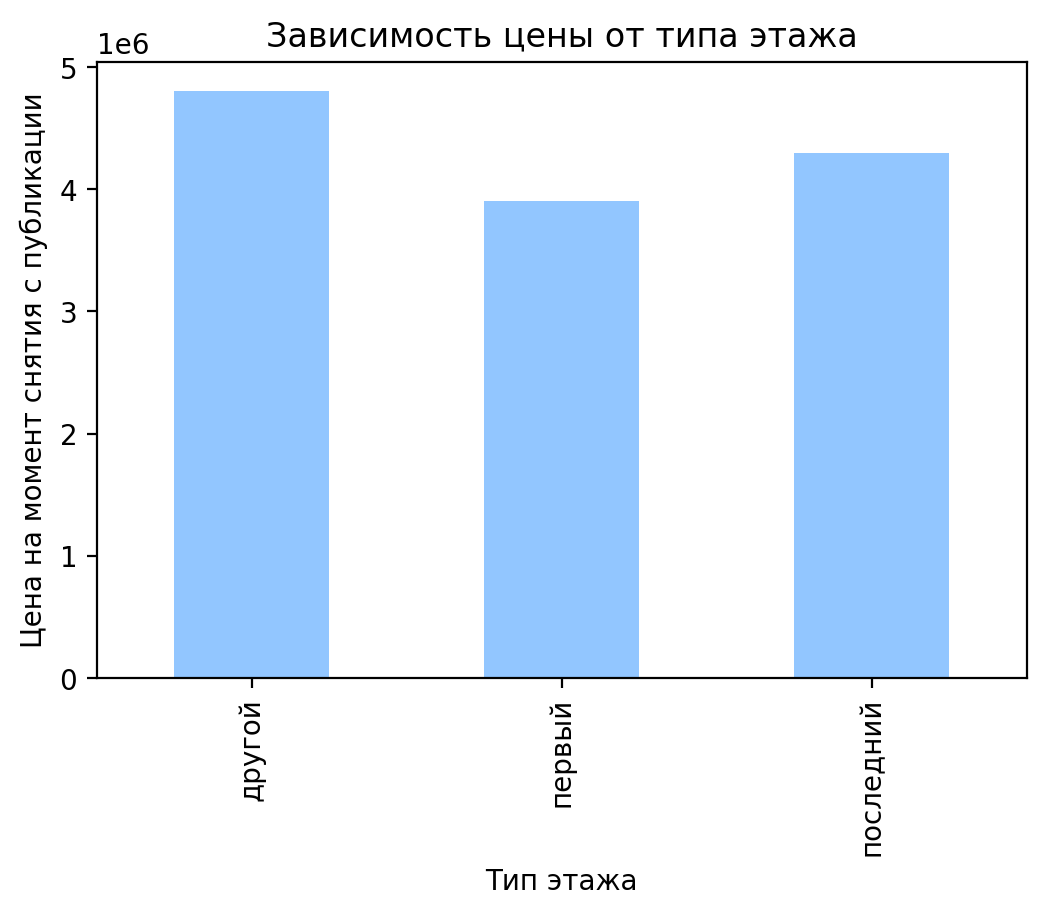

In [65]:
# построение столбчатой диаграммы по типу этажа
df_floor_type.plot.bar(xlabel='Тип этажа', ylabel='Цена на момент снятия с публикации', legend=False).set_title('Зависимость цены от типа этажа');

Более высокое значение цены наблюдается у квартир, этаж которой относится к категории "другой". У квартир, которые находятся на первом/последнем этажах, медианное значение цены ниже.

In [66]:
# создание сводной таблицы с медианным значением цены в зависимости от дня недели
df_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='median')

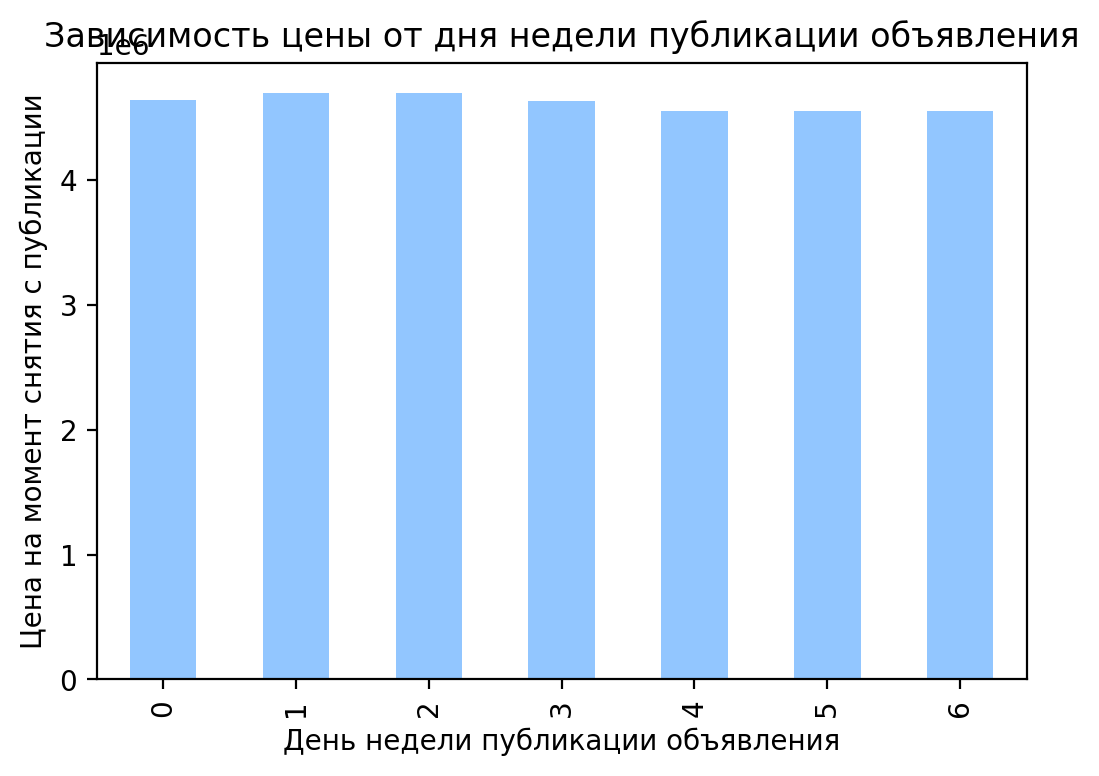

In [67]:
# построение столбчатой диаграммы по дню недели
df_weekday.plot.bar(xlabel='День недели публикации объявления', ylabel='Цена на момент снятия с публикации', legend=False).set_title('Зависимость цены от дня недели публикации объявления');

Как и ожидалось, зависимость между ценой объекта и днем недели отсутствует.

In [68]:
# создание сводной таблицы с медианным значением цены в зависимости от месяца
df_month = data.pivot_table(index='month', values='last_price', aggfunc='median')

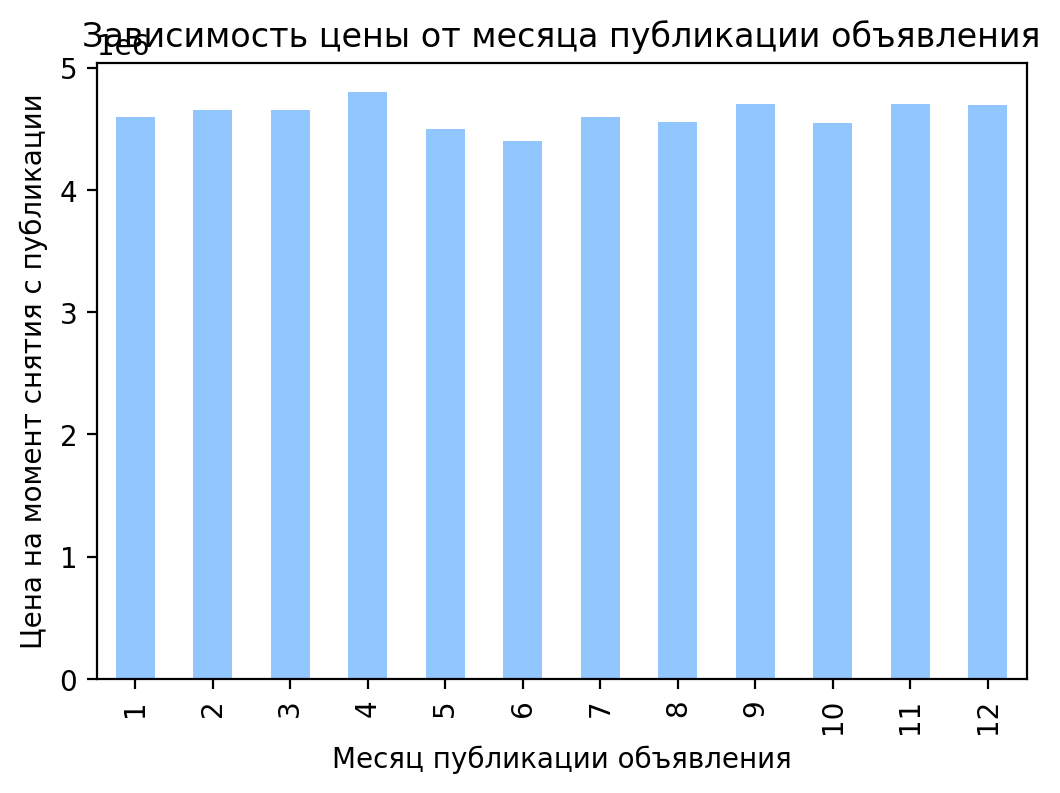

In [69]:
# построение столбчатой диаграммы по месяцу
df_month.plot.bar(xlabel='Месяц публикации объявления', ylabel='Цена на момент снятия с публикации', legend=False).set_title('Зависимость цены от месяца публикации объявления');

Между месяцем публикации объявления и ценой объекта зависимости так же не наблюдается.

In [70]:
# создание сводной таблицы с медианным значением цены в зависимости от года
df_year = data.pivot_table(index='year', values='last_price', aggfunc='median')

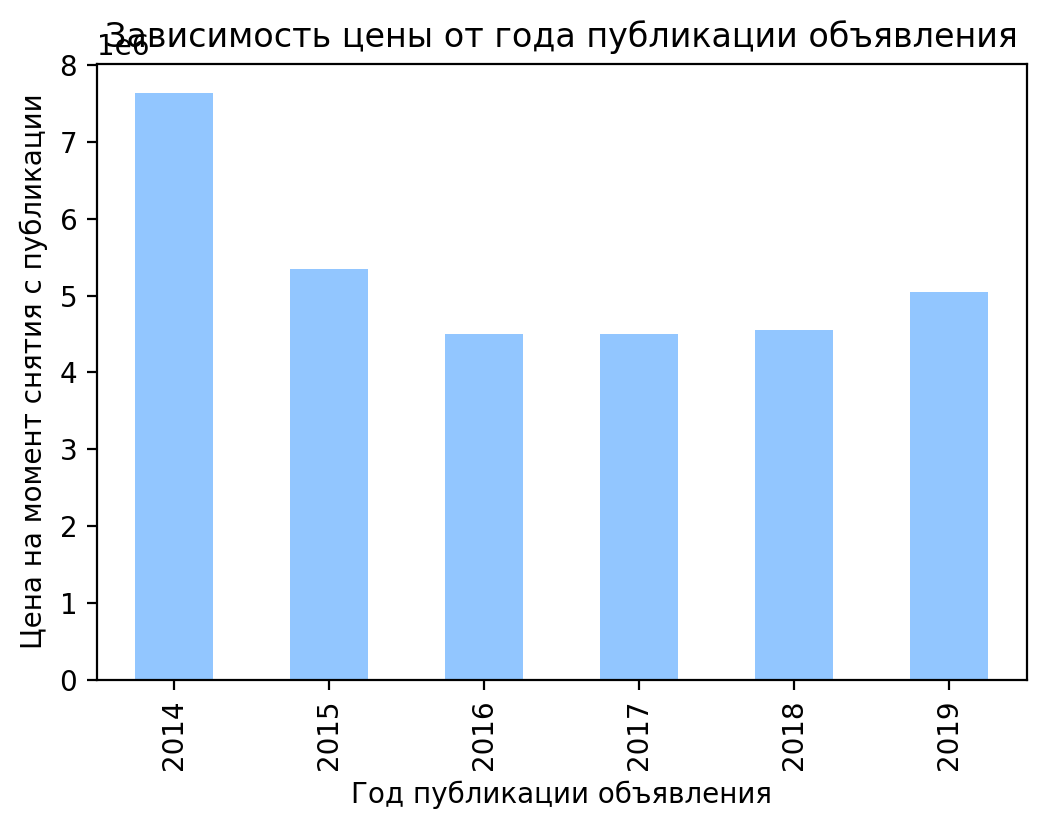

In [71]:
# построение столбчатой диаграммы по году
df_year.plot.bar(xlabel='Год публикации объявления', ylabel='Цена на момент снятия с публикации', legend=False).set_title('Зависимость цены от года публикации объявления');

Год публикации в целом не оказывает влияния на цену квартиры, <span style="color:blue">но в 2014 году медианное значение цены было значительно выше.</span>

Таким образом, наибольшее влияние на цену объекта из проанализированных характеристик оказывает общая площадь квартиры.

In [72]:
# расчет количества объявлений для каждого населенного пункта
# и среднего значения цены/кв.м. по 10 с наибольшим количеством объявлений
data_10 = data.groupby('locality_name').agg({'price_for_sqm': 'mean', 'rooms': 'count'}).sort_values(by='rooms', ascending=False).head(10)
data_10.columns = ['price_for_sqm', 'quantity']

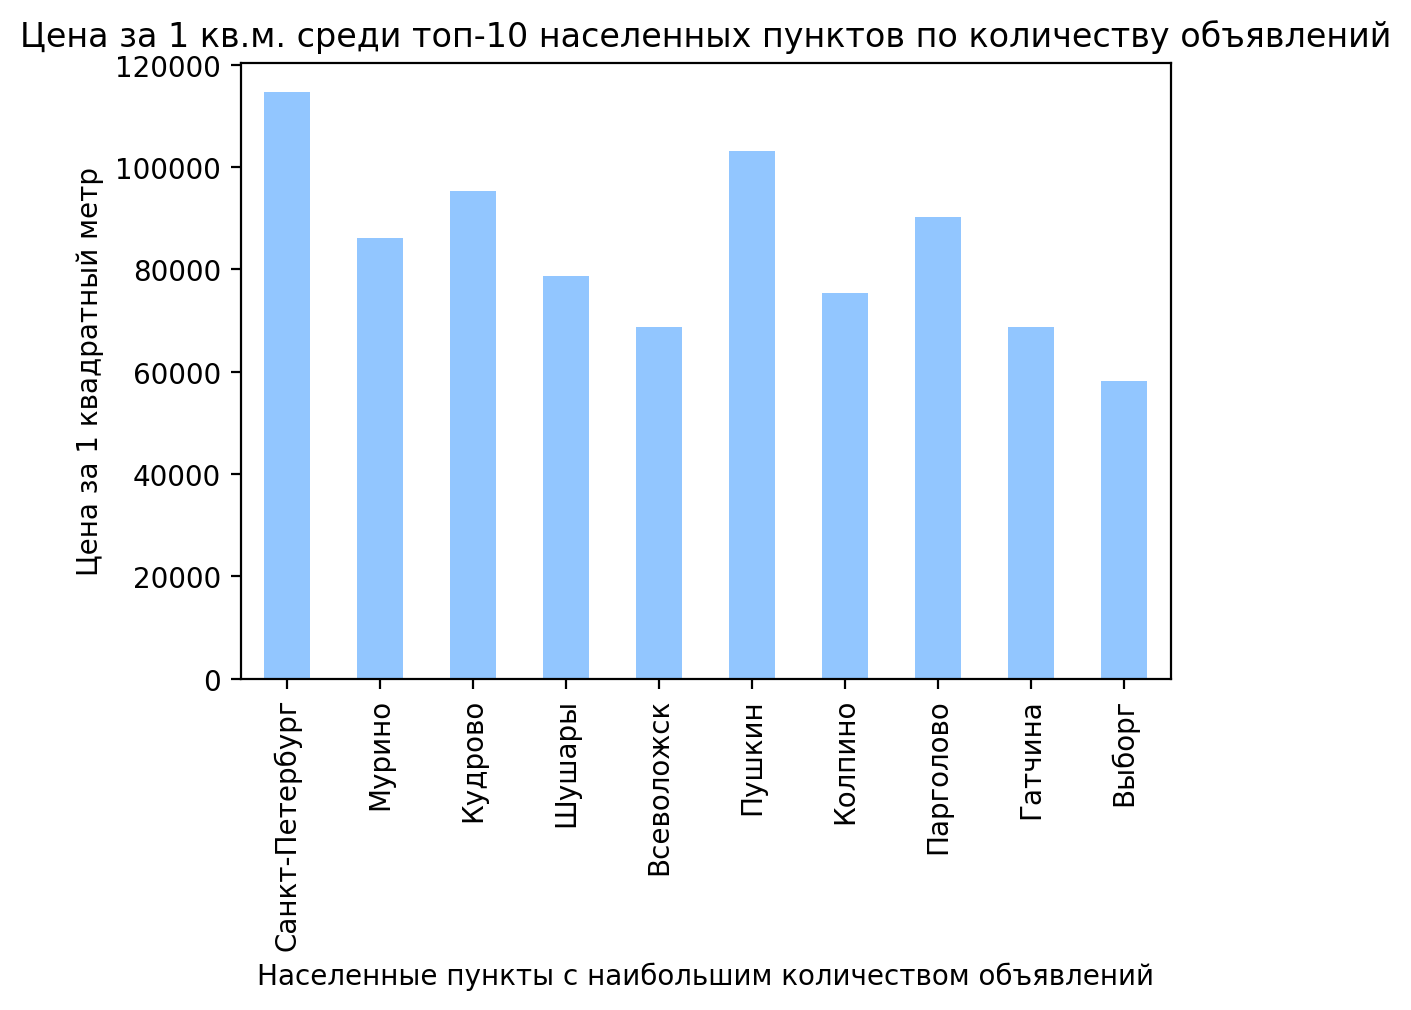

In [73]:
# построение столбчатой диаграммы по цене за 1 кв.м.
data_10['price_for_sqm'].plot.bar(xlabel='Населенные пункты с наибольшим количеством объявлений', ylabel='Цена за 1 квадратный метр', legend=False).set_title('Цена за 1 кв.м. среди топ-10 населенных пунктов по количеству объявлений');

Самая высокая из 10 населённых пунктов с наибольшим числом объявлений стоимость квадратного метра в г. Санкт-Петербург, а самая низкая - в г. Выборг.

In [74]:
# создание отдельного датафрейма со столбцами: цена и расстояние до центра
# для квартир, находящихся в Санкт-Петербурге, где нет пропусков и нулевых значений в столбце с расстоянием до центра
spb_data = data.loc[(data['locality_name'] == 'Санкт-Петербург') & (~data['city_centre_km'].isna()) & (data['city_centre_km'] != 0), ['last_price', 'city_centre_km']]

In [75]:
# расчет среднего значения цены за 1 км до центра
(spb_data['last_price'] / spb_data['city_centre_km']).mean()

1358632.701598054

Таким образом, средняя цена каждого километра до центра составляет 1,4 млн.

In [76]:
# расчет коэффициента корреляции между ценой и расстоянием до центра
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (~data['city_centre_km'].isna())]['last_price'].corr(data['city_centre_km'])

-0.2975068404594445

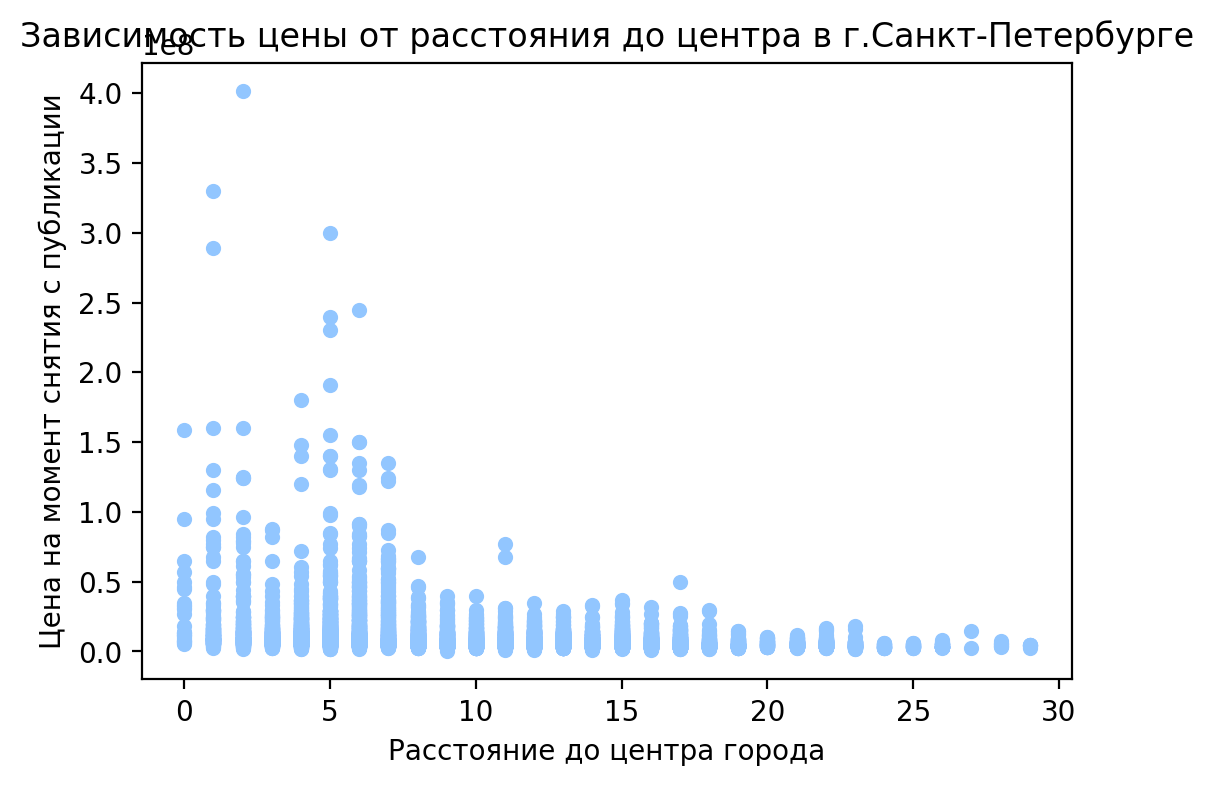

In [77]:
# построение диаграммы рассеяния для расстояния до центра
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (~data['city_centre_km'].isna())].plot(x='city_centre_km', y='last_price', kind='scatter', xlabel='Расстояние до центра города', ylabel='Цена на момент снятия с публикации').set_title('Зависимость цены от расстояния до центра в г.Санкт-Петербурге');

По результатам расчетов можно сделать вывод о том, что зависимости между ценой квартиры и расстоянием до центра в г.Санкт-Петербурге практически нет, значение коэффициента корреляции составляет -0.3.

### Общий вывод

В ходе изучения общей информации о датафрейме было обнаружено большое количество пропущенных значений (в более, чем половине столбцов), а также аномалии, неявные дубликаты и неверные типы данных.

Во время предобработки данных пропущенные значения были заполнены в тех столбцах, где это представляется возможным. Явные выбросы, неявные дубликаты и объявления без указанного населенного пункта были удалены, чтобы избежать искажения данных. Типы данных были исправлены.

Кроме того, были добавлены дополнительные столбцы для проведения более тщательного анализа.

В ходе исследовательского анализа данных были построены гистограммы по каждой характеристике с целью выявить частоту их значений в датасете, по результатам их построения также были определены наиболее часто встречающиеся (пиковые) значения, а также аномальные значения. Также, были построены диаграммы рассеяния и столбчатые графики с целью определить влияние параметров на цену объекта. Кроме того, были определены 10 населенных пунктов с наибольшим количеством объявлений и по ним рассчитано среднее значение цены квадратного метра.

По результатам можно сделать ряд выводов:
- больше всего значений приходится на общую площадь ~от 30 до 50 кв.м.;
- чаще всего продаются однокомнатные и двухкомнатные квартиры;
- что касается цены объекта, основная масса значений сосредоточена в пределах 4 млн.;
- на количество публикаций о продаже, не влияет день недели, в который они были сделаны, единственное наблюдение, что в выходные их делают меньше;
- рост предложения на рынке продажи недвижимости наблюдается в феврале-апреле, а спад - в январе, мае и декабре;
- наибольшее влияние на цену объекта оказывает общая площадь квартиры, и, как следствие от этого, жилая площадь, но в меньшей степени;
- более высокое значение цены наблюдается у квартир, этаж которой относится к категории "другой". У квартир, которые находятся на первом/последнем этажах, медианное значение цены ниже;
- среди населенных пунктов с наибольшим количеством объявлений стоимость квадратного метра дороже всего в г.Санкт-Петербург.